# Tarea 3

# Física Estadística

## Diego Barón, Universidad de Antioquia

## Resumen

En esta tarea se resuelve el modelo de Ising bidimensional, el método utlizado es calcular cada uno de los microestados y las energias asociadas a cada uno de estos para obtener la función partición. Encontramos una transición de fase del sistema, y se analizan los dominios magnéticos encontrados.

### Palabras clave: 
Modelo de Ising 2D

#### NOTA: Este notebook debe ser corrido desde el principio para que funcione debidamente.


## Introducción

PONER INTRO


## Resultados y discusión

### Método de conteo exacto

En esta primera parte se definen las funciones necesarias para calcular los microestados y la densidades de estado. Es importante tener en cuenta que se hizo el cálculo de las energías utilizando condiciones de frontera perioódicas.

In [1]:
import numpy as np  # IMPORTAR LAS LIBRERIAS NECESARIAS
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# ESTA RUTINA FUE TOMADA DE UNA FUENTE EXTERNA EN STACKOVERFLOW

def next_permutation(seq, pred=cmp): # RUTINA PARA GENERAR LAS PERMUTACIONES CON REPETICION 
    """Like C++ std::next_permutation() but implemented as
    generator. Yields copies of seq."""
    def reverse(seq, start, end):
        # seq = seq[:start] + reversed(seq[start:end]) + \
        #       seq[end:]
        end -= 1
        if end <= start:
            return
        while True:
            seq[start], seq[end] = seq[end], seq[start]
            if start == end or start+1 == end:
                return
            start += 1
            end -= 1
    if not seq:
        raise StopIteration
    try:
        seq[0]
    except TypeError:
        raise TypeError("seq must allow random access.")
    first = 0
    last = len(seq)
    seq = seq[:]
    # Yield input sequence as the STL version is often
    # used inside do {} while.
    yield seq[:]
    if last == 1:
        raise StopIteration
    while True:
        next = last - 1
        while True:
            # Step 1.
            next1 = next
            next -= 1
            if pred(seq[next], seq[next1]) < 0:
                # Step 2.
                mid = last - 1
                while not (pred(seq[next], seq[mid]) < 0):
                    mid -= 1
                seq[next], seq[mid] = seq[mid], seq[next]
                # Step 3.
                reverse(seq, next1, last)
                # Change to yield references to get rid of
                # (at worst) |seq|! copy operations.
                yield seq[:]
                break
            if next == first:
                raise StopIteration
    raise StopIteration

In [3]:
# GENERADOR DE MICROESTADOS RED N=L*L


def Energias(L): # ESTA FUNCION SOLO DEPENDE DEL TAMANO DEL LADO DE LA RED
    Energias=[]
    N=L*L #NUMERO DE SPINES EN RED
    for i in range(0,N+1): # CREA LAS PERMUTACIONES CON REPETICION DE ESTADOS ARRIBA Y ABAJO
        print str(i)+" Espines abajo"
        microestados=list(next_permutation([-1]*i+[1]*(N-i)))
        c=0
        for i in microestados:
            microestados[c]=np.reshape(i,(L,L)) # GENERA LOS ARREGLOS EN FORMA DE MATRICES CUADRADAS
            c+=1
        for micro in microestados: # ESTA RUTINA CALCULA LA ENERGIA DE CADA MICROESTADO
            Energia=0
            for i in range(L): # SE RECORREN LOS ARREGLOS
                for j in range(L):
                    arriba=i-1
                    abajo=i+1
                    der=j+1
                    izq=j-1
                    if arriba<0: # CON ESTAS CONDICIONES SE IMPLEMENTAN LAS CONDICIONES DE FRONTERA PERIODICAS
                        arriba=-1
                    if abajo>L-1:
                        abajo=0
                    if der>L-1:
                        der=0
                    if izq<0:
                        izq=-1
                    Energia=Energia-micro[i][j]*micro[arriba][j]-micro[i][j]*micro[abajo][j]-micro[i][j]*micro[i][der]-micro[i][j]*micro[i][izq]
            Energia=Energia/2 # LA FUNCION ANTERIOR CUENTA DOS VECES CADA INTERACCION
            Energias.append(Energia)
    return Energias # ESTA FUNCION DEVUELVE UN VECTOR CON LAS ENERGIAS CORRESPONDIENTES A CADA MICROESTADO

# ESTA FUNCION CALCULA LA DENSIDAD DE ESTADOS
                        
def DensidadEstado(Energias):
    EnergiasSR=[]
    Omega=[]
    for i in Energias: # CUENTA EL NUMERO DE DIFERENTES ENERGIAS
        if i not in EnergiasSR:
            EnergiasSR.append(i)
    for j in EnergiasSR: # CUENTA EL NUMERO DE VECES QUE SE REPITE CADA ENERGIA PARA CALCULAR OMEGA
        c=0
        for k in Energias:
            if k==j:
                c+=1
        Omega.append(c)
    Densidad=[]
    for m in range(len(EnergiasSR)):
        Densidad.append([EnergiasSR[m],Omega[m]])
    return Densidad # DEVUELVE UNA FUNCION CON EL PRIMER VALOR SIENDO LA ENERGIA Y EL SEGUNDO 
# EL NUNERO DE MICROESTADOS QUE POSEEN ESE VALOR 


In [4]:
# MALLA 2*2

t0=time()
E22=Energias(2)
Resultado22=DensidadEstado(E22)
t1=time()

#ESCRIBE LOS  RESULTADOS DEL TIEMPO DE COMPUTO Y DENSIDAD DE ESTADOS EN UN VECTOR
f = open('Energias22.txt','w')
f.write(str(Resultado22))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo


In [5]:
# MALLA 3*3

t0=time()
E33=Energias(3)
Resultado33=DensidadEstado(E33)
t1=time()

f = open('Energias33.txt','w')
f.write(str(Resultado33))
f.write("\n"+str(t1-t0))
f.close()


0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo


In [6]:
# MALLA 4*4

t0=time()
E44=Energias(4)
Resultado44=DensidadEstado(E44)
t1=time()

f = open('Energias44.txt','w')
f.write(str(Resultado44))
f.write("\n"+str(t1-t0))
f.close()

0 Espines abajo
1 Espines abajo
2 Espines abajo
3 Espines abajo
4 Espines abajo
5 Espines abajo
6 Espines abajo
7 Espines abajo
8 Espines abajo
9 Espines abajo
10 Espines abajo
11 Espines abajo
12 Espines abajo
13 Espines abajo
14 Espines abajo
15 Espines abajo
16 Espines abajo


In [13]:
# MALLA 5*5
'''
t0=time()
E55=Energias(5)
Resultado55=DensidadEstado(E55)
t1=time()

f = open('Energias55.txt','w')
f.write(str(Resultado55))
f.write("\n"+str(t1-t0))
f.close()
'''
Resultado55=[[-50, 2], [-42, 50], [-38, 100], [-34, 850], [-30, 3140], [-26, 16300], [-22, 74500], [-18, 311800], [-14, 1014900], [-10, 2696080], [-6, 5230300], [-2, 7431800], [2, 7413900], [6, 5276500], [10, 2645740], [14, 1024150], [18, 314300], [22, 82750], [26, 14800], [30, 2470]]

Ya que en este punto tenemos las densidades de estado, ahora nos disponemos a calcular la función de partición mediante:

$$Z(\beta)=\sum_E \Omega(E)\exp(-\beta E)$$

Además vamos a calcular el calor específico por partícula, esto lo haremos utilizando la siguiente expresión teórica (la cual demostramos aquí mismo):

$C_v=\frac{\beta^2}{N}(\langle E^2\rangle-\langle E\rangle^2) $  (1)

Demostración de (1):


In [23]:

def Zeta(T,Densidad): #CALCULA LA FUNCION DE PARTICION

    zet=0
    for j in Densidad:
        zet+=j[1]*np.exp(-1.0*j[0]/T)
    return zet

def prome_ene(T,Densidad): #CALCULA EL PROMEDIO DE LA ENERGIA
    e=0
    for j in Densidad:
        e+=j[0]*j[1]*np.exp(-1.0*j[0]/T)
    return e/Zeta(T,Densidad)
def prome_ene2(T,Densidad): #CALCULA EL CUADRADO DEL PROMEDIO DE LA ENERGIA 
    e2=0
    for j in Densidad:
        e2+=j[0]*j[0]*j[1]*np.exp(-1.0*j[0]/T)
    return e2/Zeta(T,Densidad)

In [26]:
#CALOR ESPECIFICO PARA EL SISTEMA 2*2
T=np.linspace(0.1,10,200)
e22=np.array([prome_ene2(i,Resultado22) for i in T ])
e2=np.array([prome_ene(i,Resultado22) for i in T ])
cv2=(e22-e2*e2)/T/T/4
#3*3
T=np.linspace(0.1,10,200)
e23=np.array([prome_ene2(i,Resultado33) for i in T ])
e3=np.array([prome_ene(i,Resultado33) for i in T ])
cv3=(e23-e3*e3)/T/T/9
#4*4
T=np.linspace(0.1,10,200)
e24=np.array([prome_ene2(i,Resultado44) for i in T ])
e4=np.array([prome_ene(i,Resultado44) for i in T ])
cv4=(e24-e4*e4)/T/T/16
#5*5
T=np.linspace(0.1,10,200)
e25=np.array([prome_ene2(i,Resultado55) for i in T ])
e5=np.array([prome_ene(i,Resultado55) for i in T ])
cv5=(e25-e5*e5)/T/T/25

import scipy.special as ss

T=np.linspace(0.1,10,200)
k=np.sinh(2/T)*2/np.cosh(2/T)**2
kprime=2*np.tanh(2/T)**2 - 1
Kuno=ss.ellipk(k)          #Complete elliptic integral of the first kind
Euno=ss.ellipe(k)          #Complete elliptic integral of the second kind.

Exacto=(2/np.pi)*(1/(T*np.tanh(2/T)))**2*(2*Kuno-2*Euno-(1-kprime)*(np.pi/2+kprime*Kuno))

prome_ene(2.0,Resultado55)/25

-1.7498647071107449

[]

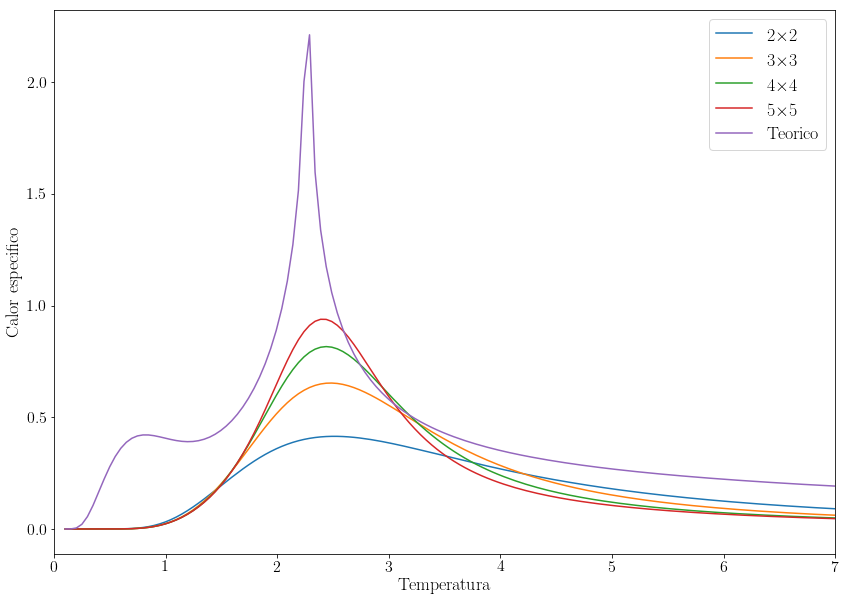

In [31]:
# CURVAS DE CALOR ESPECIFICO VERSUS TEMPERATURA



plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(T,cv2,label=r'2\times2')
plt.plot(T,cv3,label=r'3\times3')
plt.plot(T,cv4,label=r'4\times4')
plt.plot(T,cv5,label=r'5\times5')
plt.plot(T,Exacto,label=r"Teorico")
xlim(0,7)
plt.legend(fontsize=18)
plt.plot()

En esta gráfica se muestra la curva de calor específico por partícula para diferentes tamaños de sistema y además hemos agregado el resultado analítico. Podemos ver como el pico va corriendose hacia la izquierda a medida que aumenta la dimensionalidad del sistema. Otro hecho muy importante es ver que desde el sistema 2X2 se puede observar una transición de fase, que se hace más marcada a medida que aumentamos la dimensionalidad.

Esta transición significa que para una temperatura menor a la temperatura de curie (aquella que se define en el máximo de la curva de calor específico) el sistema está en un estado ferromagnético. Luego de esta temperatura el sistema cambia de fase a un estado paramagnético. Es interesante observar entonces que aún cuando no hay un campo magnético externo, cualquier material por debajo de la temperatura de curie es ferromagnético. Esto explica como algunos materiales como el hierro tienen naturalmente este comportamiento.

Adicionalmente agregamos la curva de la temperatura de Curie versus el tamaño de sistema donde se puede observar que esta va disminuyendo, cabe resaltar que el valor teórico es $Tc=2.269185$.


In [141]:
# OBTIENE LA TEMPERATURA DE CURIE
TC=[]
#2*2
indice=cv2.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#3*3
indice=cv3.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#4*4
indice=cv4.argmax(axis=0)
tc=T[indice]
TC.append(tc)
#5*5
indice=cv5.argmax(axis=0)
tc=T[indice]
TC.append(tc)


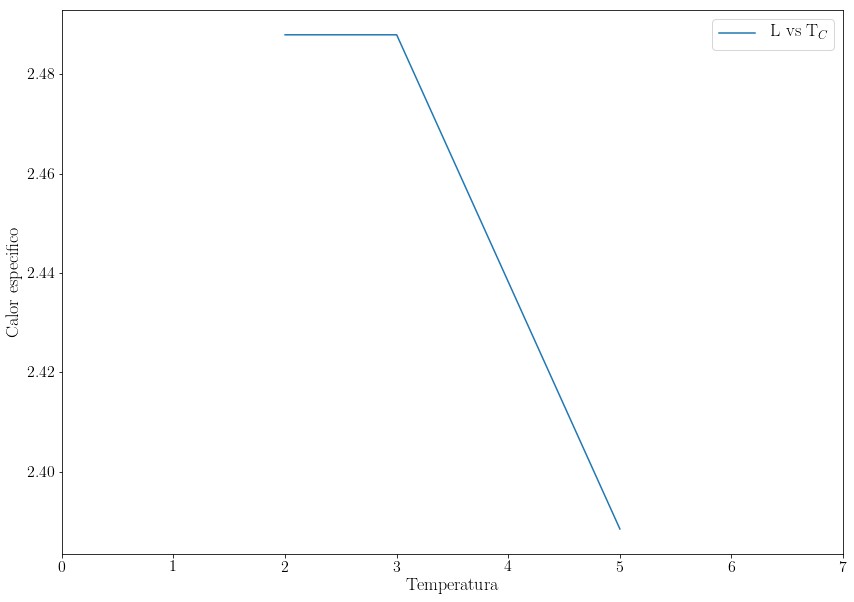

In [144]:
# GRAFICA TEMPERATURA DE CURIE VS TAMAÑO DEL SISTEMA
L=[2,3,4,5]
matplotlib.rcParams['figure.figsize'] = [14, 10]
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.xlabel("Temperatura",fontsize=18)
plt.ylabel("Calor especifico",fontsize=18)
plt.plot(L,TC,label=r"L vs T_C")
xlim(0,7)
plt.legend(fontsize=18)



## Estimación de tiempo computacional y memoria necesaria

En nuestros programas ademas de guardar la densidad de estados hemos calculado el tiempo de cómputo necesario para cada tamaño de sistema. Con estos valores hemos ajustado una línea de tendencia exponencial para calcular cuánto llevaria ejecutar el cálculo para un sistema 6X6 y 8X8. En el primer caso segun nuestra estimación son aproximadamente 2.7 días mientras que en el caso 8X8 serían 80 años. Esto demuestra que el cálculo de la temperatura de curie por el método del conteo de microestados completo es muy ineficiente y poco práctico.

Además queremos hacer un comentario acerca de la cantidad de memoria necesaria para manejar el problema. Si usaramos C++ que es un poco mas eficiente en el manejo de memoria para el caso 6X6 necesitariamos calcular $2^{36}$ configuraciones y cada una de ellas esta compuesta de un vector de 36 enteros. C++ utiliza 32 de memoria por entero por tanto la cantidad de memoria RAM necesaria para resolver el problema es:

$2^{36}*36*32 bits=9216 GB $

Una cantidad muy poco practica.

<img src="imagen1.png",width=700,height=710>

In [ ]:
archivo=open("Energias22.txt","r")
datos=archivo.readlines()
densidad=datos[1]